<a href="https://colab.research.google.com/github/shivsurya-s/Task_7/blob/main/Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import RocCurveDisplay

**Importing the dataset**

In [13]:
df=pd.read_csv('https://raw.githubusercontent.com/shivsurya-s/Task_7/main/Dataset/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
df.drop(["User ID"],axis=1,inplace=True)

In [17]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

**Splitting the dataset into the Training set and Test set**

In [18]:
X=df[["Gender","Age","EstimatedSalary",]]
y=df['Purchased']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Feature Scaling**

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
df = sc.transform(df)

**Fitting Decision Tree Classification to the Training set**

In [21]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion="gini", max_depth = 4)
model.fit(X,y)

DecisionTreeClassifier(max_depth=4)

**Predicting the Test set results**

In [22]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

**Making the Confusion Matrix**

In [24]:
confusion_matrix(y_test,y_test_pred)
pd.crosstab(y_test, y_test_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,58,0,58
1,2,20,22
All,60,20,80


**Visualising the Training set results**

In [25]:
training_score = model.score(X_train,y_train)*100
print("Train data score is :",training_score)

Train data score is : 91.5625


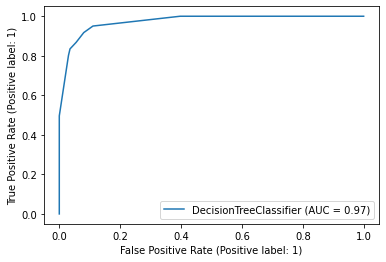

In [26]:
RocCurveDisplay.from_estimator(model,X_train,y_train)

**Visualising the Test set results**

In [27]:
test_score=accuracy_score(y_test,y_test_pred)*100
print("Test data score is :",test_score)

Test data score is : 97.5


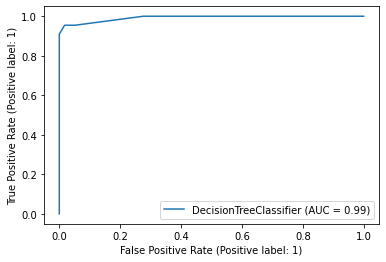

In [28]:
RocCurveDisplay.from_estimator(model,X_test,y_test)